In [0]:
#ZHUMAKHAN NAZIR
#TASK1

In [0]:
%pylab inline
from random import random as rand
from sklearn.linear_model import LinearRegression
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


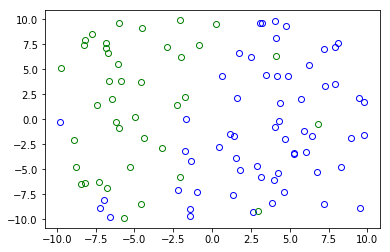

In [0]:
def GenerateData(N):
    X = np.ndarray(shape=(N,2),dtype=float)
    y = np.ndarray(shape = (N,),dtype = float)
    m = np.ndarray(shape = (2,1),dtype = float)
    
    #create b,c of a*x1+b*x0+c = 0 randomly, in range -10 and 10
    
    m[0],m[1] = sign((rand()-.5))*N/10*rand(),sign((rand()-0.5))*N/10*rand() 
    for i in range(len(X)):
        
        #choose random point in range -N/10 and N/10
        X[i] = [sign((rand()-.5))*N/10*rand(),sign((rand()-.5))*N/10*rand()]
        if m[0]*X[i][0]+m[1] < X[i][1]:
            y[i] = 1.0
        else:
            y[i] = 0.0

    #take random N/10 points and switch their label in y 
    
    for i in range(N//10):
        j = int(rand()*N)
        y[j] = -(y[j]-1.0)
    return X,y
X,y = GenerateData(100)
c0 = y==0
c1 = y==1
plot(X[:,0][c0], X[:,1][c0], 'o', mec='b', mfc='none')
plot(X[:,0][c1], X[:,1][c1], 'o', mec='g', mfc='none')


In [0]:
class Perceptron:
    def __init__(self):
      
        #works for data with 2 independent features
        #since we use it for data from GenerateData(N) it is OK
        self.pw = zeros(3)
        self.pwe = 1.0
        self.w = zeros(3)
        
    def predict(self, w, x):
      
        #add x0 = 1, for w0, (like c in equation of line ax + by + c = 0)
        
        x = append([1],x, axis=0)
        dot = np.dot(w,x.T)
        return 1.0 if dot >= 0.0 else 0.0
    
    def testE(self,w,X,y):
        
        #predict, and compare with actual label,
        #count number of mismatches
        
        N = len(X)
        Ecounter = 0
        for i in range(N):
            if self.predict(w, X[i]) != y[i]:
                Ecounter+=1
        return Ecounter/N
    
    def fit(self, X, y):
        for i in range(100*len(X)):
            j = i%len(X)
            x = append([1],X[j], axis=0)
            dotp = np.dot(self.w,x.T)
            if (dotp >= 0.0 and y[j] == 0.0) or (dotp < 0.0 and y[j] == 1.0):
                yprime = -1 if y[j] == 0.0 else 1
                self.w = self.w + yprime * x
                
                #check if it is case to update pocket weights
                
                Etest = self.testE(self.w,X,y)
                if Etest < self.pwe:
                    self.pw = self.w
                    self.pwe = Etest 
                    

In [0]:
class LinReg:
    def fit(self,X,y):
      
        #create new Xp which augments X with 1 at the beginning of each row
        
        self.Xp = np.ndarray(shape=(len(X),len(X[0])+1),dtype=float)
        for i in range(len(X)):
          self.Xp[i] = np.hstack([1,X[i]])
        
        #compute weigth with w = pseudo_inverse(X X.T)X.T y
        
        self.w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(self.Xp.T,self.Xp)),self.Xp.T),y)
    def predict(self,X):
      
      predictions = array([]) 
      for i in range(len(X)):
          predictions = np.append(predictions, math.floor(np.dot(self.w, np.append(1.0,X[i]).T)))
      return predictions
    
    def testE(self,X):
        
        #compute predictions,and count mismatches,
        #returns number mismatched preditions divided number of all data
        
        counter = 0
        predictions = self.predict(X)
        for i,dotp in enumerate(predictions):
            if dotp != y[i]:
                counter+=1
        return counter/len(X)
        
#plot(x,l.w[0]+l.w[1]*x)

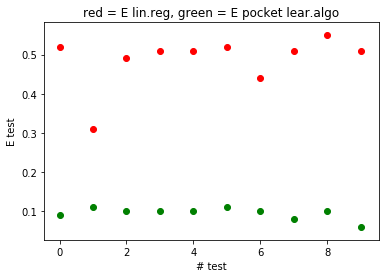

In [0]:
plt.title('red = E lin.reg, green = E pocket lear.algo')
plt.xlabel('# test')
plt.ylabel('E test')

#generate random data, run perceptron and linear regression for 10 times

for i in range(10):
    X,y = GenerateData(100)
    p = Perceptron()
    p.fit(X,y)
    linReg = LinReg()
    linReg.fit(X,y)
    plt.scatter(i, p.testE(p.pw,X,y),c='g')
    plt.scatter(i,linReg.testE(X),c='r')
plt.show()

In [0]:
#Green points belong to pocket learning algorithm, while red points belong to linear regression model
#Overall pocket algorithm is doing better that lin.reg.
#This result was expected since way we generated data more fits to perceptron, 
# LIMITATION of linear regression for this data is that it just reduces mean-square error, in this case it is not required.
#Perceptrons error is around 0.1 or 10% it is because when we generated data, we changed true label of N/10 data points

In [0]:


#TASK2



# Gradient Descent for Logistic Regression

In [0]:
# loading popular iris data from sklearn

iris = load_iris()
X,y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
class LogReg:
    def __init__(self,mu, T):
        # mu is learning rate
        self.mu = mu
        # T is number of iterations
        self.T = T
        
    def gradE(self,w,x,yi):
        
        # yx/(1+e^(2*ywTx))
        
        e = array([])
        c = -2*yi/( 1 + math.exp( yi * 2 * np.dot( w, x.T ) ) )
        for _,xi in enumerate(x):
            e = np.append(e,c*xi)
        return e
    def Ew(self,w,X,y):
        
        # compute error of hypotheis(weigth in this case)
        
        N = len(X)
        E = 0.0
        for i in range(N):
            # ln(1+e^(-y2wx))
            E += math.log( 1 + math.exp( -y[i] *  2 * np.dot( w, X[i].T )  ) )
        return E/N
    def Ein(self,t):
      
        # compute in-sample error
        
        counter = 0
        for i in range(self.N):
            if self.g[t][i] != y[i]:
                counter+=1
        return counter/self.N
        
    def fit(self,X,y):
      
        self.N = len(X)
        
        # create weigth, initialize with 0's
        
        if self.N != 0:
          self.w = zeros(len(X[0]))
        self.g = list()
        for t in range(self.T):
            
            # pick random point
            
            n = int(rand()*len(X))
            
            # w = w-mu*gradient_of_error_functoin
            
            self.w = self.w - self.mu * self.gradE(self.w, X[n], y[n])
            self.g.append( [sign( np.dot( self.w, x.T) ) for i,x in enumerate(X)] )
    @staticmethod
    def predict(w,x):
        return 1/( 1 + math.exp( np.dot( -w, x.T ) ) )

# multi class regression using LogReg defined above

class MClassReg:
    def fit(self,X, y):
        
        #  types of classes
        
        self.classes = np.unique(y)
        self.D = []
        self.W = dict()
        
        # divide data points according to their classes
        # D[0] contains data points of first class
        # D[1] contains data points of second class and so on.
        
        for j in range(len(self.classes)):
            temp = np.ndarray((0,len(X[0]) if len(X) != 0 else 0))
            for i in range(len(y)):
                if y[i] == self.classes[j]:
                    temp = np.vstack([temp,X[i]])
            self.D.append(temp)
            
        # Using One versus One technique, take two distinct classes at a time,
        # run LogReg binary classifier,
        # find the best hypothesis, save it
        
        for i in range(len(self.classes)-1):
            for j in range(i+1,len(self.classes)):
                self.tx = np.vstack([self.D[i],self.D[j]])
                self.ty = [1]*len(self.D[i])
                self.ty.extend([-1]*len(self.D[j]))
                lg = LogReg(0.001,2000)
                lg.fit(self.tx,self.ty)
                self.W[(i,j)] = lg.w
    def predict(self,X):
      
        # check data points with hypothesis of each pair of class
        # for each class, sum the probability of each data point
        # take max of that sum for resulting class for data point
        
        predictions = array([-1 for i in X])
        for k,x in enumerate(X):
          
          self.scores_by_pair = dict()
          
          for i in range(len(self.classes)-1):
              for j in range(i+1,len(self.classes)):
                  self.scores_by_pair[(i,j)] = LogReg.predict(self.W[(i,j)],x) 
          
          self.scores = {new_list: 0 for new_list in self.classes}
          
          for i in range(len(self.classes)-1):
              for j in range(i+1,len(self.classes)):
                  self.scores[i]+=self.scores_by_pair[(i,j)]
                  self.scores[j]+=1-self.scores_by_pair[(i,j)]
          maxkey = -1
          maxp = 0.0
          for key in self.scores.keys():
            if self.scores[key] > maxp:
              maxp = self.scores[key]
              maxkey = key
          predictions[k] = maxkey
        return predictions

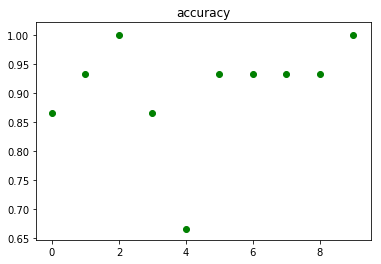

In [0]:

# load iris data point

iris = load_iris()
for i in range(10):
    
  # divide data point in to train and test with test size as 10%

  X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
    
  # use MClassReg as multi class classifier

  mc = MClassReg()
  mc.fit(X_train,y_train)
  ecounter = 0
    
  # compute accuracy with test data

  preds = mc.predict(X_test)
  for j,x in enumerate(preds): 
      if x != y_test[j]:
        ecounter+=1
  plt.scatter(i,1-ecounter/len(X_test),c='g')
plt.title("accuracy")

plt.show()

In [0]:
# Overall, the accuracy of MClassReg is reasonably high, lowest accuracy is about 67%, 
# and highes is 100%, in average accuracy for 10 runs is around 95%


#TASK3



In [0]:
# load handwritten digits

from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data, digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [0]:
# method to run k_fold given model, data, and number of folds

def k_fold(model,X,y,k):
    start = 0
    width = len(X)//k
    model.fit(np.concatenate( ( X[ 0:start ], X[ start+width:len(X) ] ) ), np.concatenate( (y[ 0:start ], y[ start+width:len(y)]) ) )
    preds = model.predict(X[start:start+width])
    ecounter = 0
    for i in range(len(y[start:start+width])):
        if preds[i] != y[i]:
            ecounter+=1
    return 1-ecounter/width

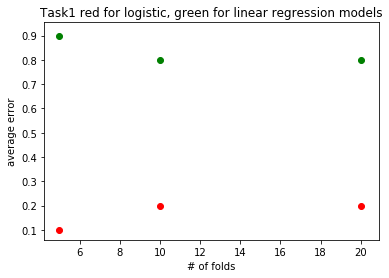

In [0]:
#
def Task1(X,y):
    plt.title("Task1 red for logistic, green for linear regression models")
    folds = [5,10,20]
    for k in folds:
        elin = 1-k_fold(LinReg(),X,y,k)
        elog = 1-k_fold(MClassReg(),X,y,k)
        plt.scatter(k,elin,c='g')
        plt.scatter(k,elog,c='r') 
    plt.xlabel("# of folds")
    plt.ylabel("average error")
    plt.show()

X,y = digits.data[:100],digits.target[:100]
Task1(X,y)
    

In [0]:
# for 5 fold logistic regression has highest accuracy, for 10 and 20 fairly the same,
# opposit to logistic reg., linear reg. model has highest error for 5 fold, but for 10 and 20 approximately the same, but still higher than that of logistic reg.

In [0]:
#part2 of task3

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
digits = datasets.load_digits()
x = digits.data
y = digits.target
digits = datasets.load_digits()

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
LinearReg = LinearRegression()
LogReg = LogisticRegression()

In [0]:
LinearReg.fit(x, y)
LogReg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
cv_scoresLinearReg, cv_scoresLogReg = [], []

scoresLinearReg = cross_val_score(LinearReg, x, y, cv = 10)
print(scoresLinearReg.mean())
scoresLogReg = cross_val_score(LogReg, x, y, cv = 10)
print(scoresLogReg.mean())

0.5343874961263955
0.9310298346839012


In [0]:

# for LinearRegression from sklearn we got mean 0.534387 cross validation accuracy score
# for LogisticRegRession from sklearm we got mean of 0.931029 cross validation accuracy score, which is much higher than LinearRegression
# for hand written digits data set.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
    test_size=0.2,random_state =1 )
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
print("r2 / variance : ", grid.best_score_)

# print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test ** 2)))


r2 / variance :  0.5425498457252129


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [0]:
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

In [0]:
clf = clf.fit(x, y)

In [0]:
print("r2 / variance : ", clf.best_score_)

r2 / variance :  0.9298831385642737


In [0]:

# for LinearRegression from sklearn we got max score of 0.5425498 GridSearchCV accuracy score
# for LogisticRegRession from sklearm we got max of 0.9298839 GridSearchCV accuracy score, which is much higher than LinearRegression
# for hand written digits data set.


In [0]:
# validation curve

In [0]:



#TASK4
#Link to contest: https://www.kaggle.com/c/digit-recognizer




In [0]:
import pandas as pd

In [0]:

# upload data to working space (did this in colab)
# if you use jupyter in localhost you can directly load file to working space just by providing location of files in you drive

from google.colab import files

# for training data

train_uploaded = files.upload()

# for testing data

test_uploaded = files.upload()


Saving test.csv to test (2).csv


In [0]:
import io

# read data uploaded to workspace in colab

train_data = pd.read_csv(io.BytesIO(train_uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(test_uploaded['test.csv']))
X,y = train_data.iloc[:,1:], train_data.iloc[:,0]


In [0]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# use logistic regression, to avoid warnings set solver="lbfgs",multi_class="auto"

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs",multi_class="auto")
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:


X_test = test_data[:]
predictions = model.predict(X_test)

submission = {'ImageId':[i+1 for i in range(len(predictions))],'Label':list(predictions)}

#create data frame with required format in kaggle submission

s = pd.DataFrame(submission, columns= ['ImageId', 'Label'])
export_csv = s.to_csv ('export_dataframe.csv', index = False, header=True, columns= ['ImageId', 'Label'],sep=",")

# download file from colab
# submit it to by follwing link: https://www.kaggle.com/c/digit-recognizer 

files.download('export_dataframe.csv')